<a href="https://colab.research.google.com/github/Hakman482/CNN-model/blob/main/ResNet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
import itertools

In [159]:
img_height, img_width = 100, 100
batch_size= 28

In [160]:
# data = tf.keras.utils.image_dataset_from_directory(data_dir)

data_dir = '/content/drive/MyDrive/newerDataset'
train_dir = '/content/drive/MyDrive/newerDataset/train'
valid_dir = '/content/drive/MyDrive/newerDataset/validation'

In [161]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle=False
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle=False

)

Found 228 files belonging to 3 classes.
Found 48 files belonging to 3 classes.


In [162]:
train_ds.class_names

['healthy', 'phase-ground', 'phase-phase']

In [163]:
class_names = train_ds.class_names

In [164]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip(
          "horizontal",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomFlip(
          "vertical",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomRotation(0.1)
  ])

In [165]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_height, img_height, 3),
    pooling='avg',
    classes=3,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable = False


resnet_model.add(data_augmentation)
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [166]:
resnet_model.build(input_shape=(None,img_width,img_height,3))
resnet_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 module_wrapper_18 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 128)              262272    
 apper)                                                          
                                                                 
 module_wrapper_20 (ModuleWr  (None, 3)                387       
 apper)                                                          
                                                     

In [167]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)

In [168]:
epochs = 15
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs =epochs,
    batch_size = batch_size
)

Epoch 1/15
9/9 [==============================] - 56s 5s/step - loss: 7.5703 - accuracy: 0.2237 - val_loss: 4.7711 - val_accuracy: 0.3333
Epoch 2/15
9/9 [==============================] - 40s 5s/step - loss: 2.0548 - accuracy: 0.5088 - val_loss: 0.8279 - val_accuracy: 0.7083
Epoch 3/15
9/9 [==============================] - 42s 5s/step - loss: 1.4134 - accuracy: 0.6404 - val_loss: 0.6706 - val_accuracy: 0.7083
Epoch 4/15
9/9 [==============================] - 44s 5s/step - loss: 0.6367 - accuracy: 0.7281 - val_loss: 0.6463 - val_accuracy: 0.7292
Epoch 5/15
9/9 [==============================] - 40s 4s/step - loss: 0.4639 - accuracy: 0.8772 - val_loss: 0.4474 - val_accuracy: 0.7708
Epoch 6/15
9/9 [==============================] - 40s 5s/step - loss: 0.3485 - accuracy: 0.9035 - val_loss: 0.4256 - val_accuracy: 0.8125
Epoch 7/15
9/9 [==============================] - 40s 5s/step - loss: 0.2961 - accuracy: 0.9254 - val_loss: 0.3457 - val_accuracy: 0.8542
Epoch 8/15
9/9 [==================

In [169]:
# for layer in pretrained_model.layers:
#     layer.trainable = True

# resnet_model.compile(
#     optimizer=Adam(learning_rate=0.00001),
#     loss ='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [170]:
# resnet_model.summary()

In [171]:
# epochs = 5
# history = resnet_model.fit(
#     train_ds,
#     validation_data = val_ds,
#     epochs =epochs,
#     batch_size = batch_size
# )

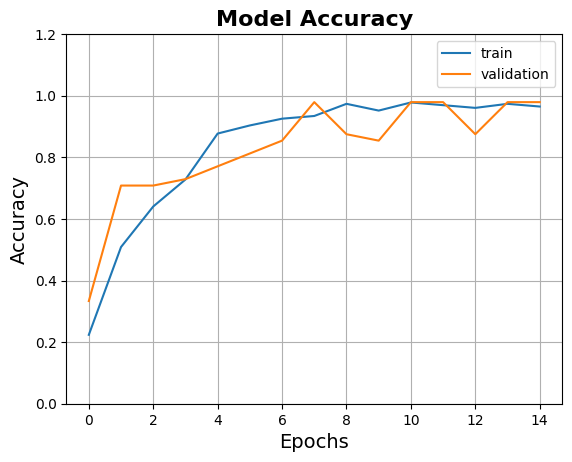

In [210]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0, ymax=1.2)
plt.grid()
plt.title('Model Accuracy',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()


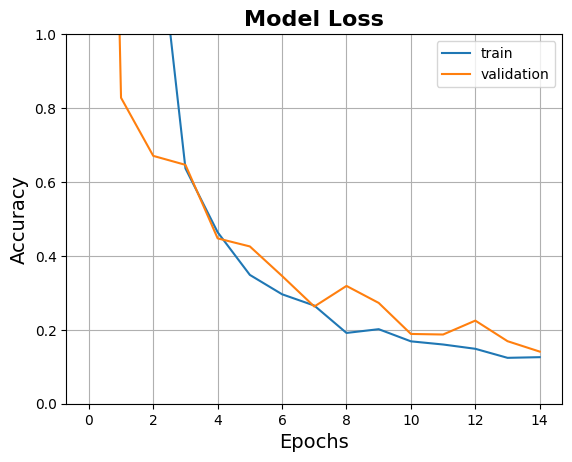

In [208]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=1)
plt.grid()
plt.title('Model Loss',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()

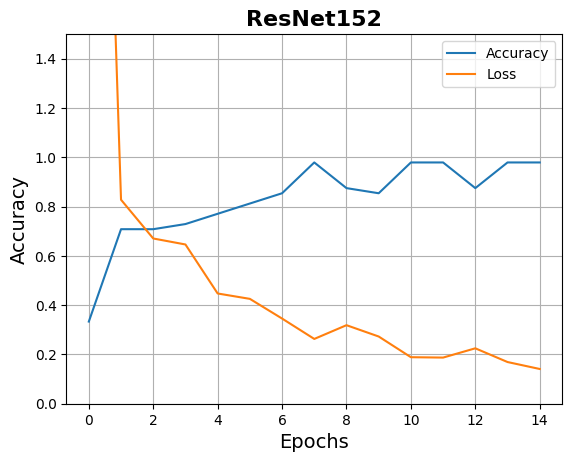

In [213]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=1.5)
plt.grid()
plt.title('ResNet152',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['Accuracy','Loss'])
plt.show()

In [186]:
true_labels = list(val_ds.map(lambda x, y: y))[0]
len(true_labels)

28

In [187]:
predictions = resnet_model.predict(val_ds)

2/2 [==============================] - 8s 2s/step


In [176]:
predictions

array([[9.23432589e-01, 7.51203522e-02, 1.44701800e-03],
       [9.23432589e-01, 7.51203522e-02, 1.44701800e-03],
       [9.50222969e-01, 4.81678285e-02, 1.60911644e-03],
       [9.50222969e-01, 4.81678285e-02, 1.60911644e-03],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [7.24385798e-01, 2.38957316e-01, 3.66569273e-02],
       [9.58947420e-01, 3.56340669e-02, 5.41844312e-03],
       [9.58947420e-01, 3.56340669e-02, 5.41844312e-03],
       [8.74957144e-01, 1.17777877e-01, 7.26490561e-03],
       [8.74957144e-01, 1.17777877e-01, 7.26490561e-03],
       [8.74957144e-01, 1.17777877e-01, 7.26490561e-03],
       [8.74957144e-01, 1.17777877e-01, 7.26490561e-03],
       [1.58011273e-01, 7.42933393e-01, 9.90553424e-02],
       [7.38418519e-01, 2.46977

In [188]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [190]:
true_labels = []
labels = list(val_ds.map(lambda x, y: y))[0]
labels_1 = list(val_ds.map(lambda x, y: y))[1]
# labels_2 = list(val_ds.map(lambda x, y: y))[2]
# labels_3 = list(val_ds.map(lambda x, y: y))[3]
# labels_4 = list(val_ds.map(lambda x, y: y))[3]
# labels_5 = list(val_ds.map(lambda x, y: y))[3]
for label in labels:
  true_labels.append(np.argmax(label))

for label in labels_1:
  true_labels.append(np.argmax(label))

# for label in labels_2:
#   true_labels.append(np.argmax(label))

# for label in labels_3:
#   true_labels.append(np.argmax(label))

# for label in labels_4:
#   true_labels.append(np.argmax(label))

# for label in labels_5:
#   true_labels.append(np.argmax(label))

print(len(true_labels))
print(true_labels)

48
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [179]:
train_labels = []
labels = list(train_ds.map(lambda x, y: y))[0]
labels_1 = list(train_ds.map(lambda x, y: y))[1]
labels_2 = list(train_ds.map(lambda x, y: y))[2]
labels_3 = list(train_ds.map(lambda x, y: y))[3]
labels_4 = list(train_ds.map(lambda x, y: y))[4]
labels_5 = list(train_ds.map(lambda x, y: y))[5]
labels_6 = list(train_ds.map(lambda x, y: y))[6]
labels_7 = list(train_ds.map(lambda x, y: y))[7]
labels_8 = list(train_ds.map(lambda x, y: y))[8]
#labels_9 = list(train_ds.map(lambda x, y: y))[9]


for label in labels:
  train_labels.append(np.argmax(label))

for label in labels_1:
  train_labels.append(np.argmax(label))

for label in labels_2:
  train_labels.append(np.argmax(label))

for label in labels_3:
  train_labels.append(np.argmax(label))

for label in labels_4:
  train_labels.append(np.argmax(label))

for label in labels_5:
  train_labels.append(np.argmax(label))

for label in labels_6:
  train_labels.append(np.argmax(label))

for label in labels_7:
  train_labels.append(np.argmax(label))

for label in labels_8:
  train_labels.append(np.argmax(label))

# for label in labels_9:
#   train_labels.append(np.argmax(label))


print(len(train_labels))
print(train_labels)

228
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [191]:
cm = confusion_matrix(true_labels, rounded_predictions)

In [214]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, cmap=cmap)
  plt.title(title,fontsize=18,weight='bold')
  plt.colorbar()
  # tick_marks = np.arrange(len(classes))
  # plt.xticks(tick_marks, classes, rotation=45)
  # plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalize confusion matrix')
  else:
    print('Confusion Matrix, without normalization')
  print(cm)


  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, cm[j,i],
            horizontalalignment="center",fontsize=16,weight='bold',
            color="white" if cm[j,i] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=13)
  plt.xlabel('Predicted label',fontsize=13)

Confusion Matrix, without normalization
[[16  0  0]
 [ 1 15  0]
 [ 0  0 16]]


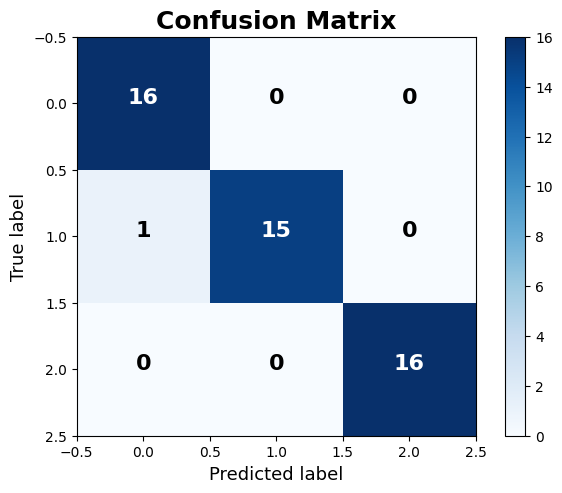

In [215]:
cm_plot_labels = ['healthy', 'phase', 'ground']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [205]:
from sklearn.metrics import classification_report
Y_pred = resnet_model.predict(train_ds)
y_pred = np.argmax(Y_pred, axis=-1)


print(classification_report(train_labels, y_pred))

9/9 [==============================] - 29s 3s/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.97      0.95      0.96        76
           2       1.00      0.97      0.99        76

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

